In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_lib
import mnist_vae_lib

# Load data

In [2]:
train_set, test_set = mnist_data_lib.load_mnist_data()

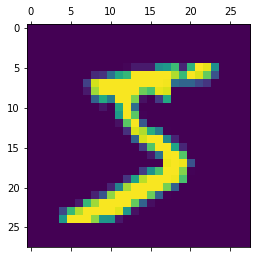

In [3]:
plt.matshow(train_set.train_data[0])

In [4]:
batchsize = 10

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [5]:
for batch_idx, d in enumerate(train_loader):
    data = d
    break

In [6]:
data[0][0, :, :].shape

torch.Size([1, 28, 28])

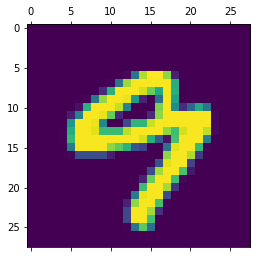

In [7]:
n = 1
plt.matshow(data[0][n, :, :].squeeze())

# Define VAE

In [8]:
vae = mnist_vae_lib.HandwritingVAE()

In [15]:
print(vae.parameters)

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=18, bias=True)
  )
)>


In [16]:
vae.decoder_list[0].parameters

<bound method Module.parameters of MLPConditionalDecoder(
  (fc1): Linear(in_features=5, out_features=784, bias=True)
  (fc2): Linear(in_features=784, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1568, bias=True)
)>

In [10]:
def get_vae_params(vae): 
    vae_params = np.array([])
    for f in vae.parameters(): 
        print(f)
        vae_params = np.append(vae_params, f.detach().numpy().flatten())
    return vae_params


<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (fc2): Linear(in_features=500, out_features=784, bias=True)
    (fc3): Linear(in_features=784, out_features=18, bias=True)
  )
)>


In [ ]:
get_vae_params(vae)

In [ ]:
assert 

In [12]:
vae.loss(data[0])

tensor(830.6706)

# test training

In [18]:
optimizer = optim.Adam(vae.parameters(), lr=0.01)

In [19]:
optimizer.zero_grad()

loss = vae.loss(data[0])

In [20]:
loss.backward()
optimizer.step()

array([nan, nan, nan, ..., nan, nan, nan])